# _Домашняя работа **2**_

## **Работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в MatPlotLib**

### Загрузка данных и первичный осмотр

Импортируем библиотеки Pandas, MatPlotLib,Seaborn и NumPy в общепринятом виде

In [38]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np # на всякий случай также импортируем NumPy

Импортируем датасет S02-hw-dataset.csv с помощью ссылки с meta-репозитория в переменную dataset и выводим первые 5 строк для проверки

In [39]:
url = "https://github.com/mirea-aie-2025/aie-course-meta/blob/main/seminars/S02/S02-hw-dataset.csv?raw=true"
dataset = pd.read_csv(url)
dataset.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


С помощью info() выведем всю основную информацию о датафрейме

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


И выведем базовые описательные статистики с помощью describe()

In [41]:
dataset.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### Базовый контроль качества

Для начала посчитаем долю пропусков в каждом столбце с помощью isna().mean()

In [42]:
dataset.isna().mean()*100

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

По результатам (на выходе % пропусков в каждом слобце) мы видим, что пропуски есть только в столбце **age**

Также проверим наличие дубликатов с помощью duplicated()

In [43]:
duplicates = dataset[dataset.duplicated(keep=False)]
duplicates

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


Теперь стоит найти и вывести все возможные случаи, которые не могут существовать (например, возраст < 0 )

In [44]:
print(dataset[(dataset["age"]<0) | (dataset["age"]>110)]) # выводим строки с не реальным возрастом
print("-"*50)
print(dataset[(dataset["purchases"]>0) & (dataset["revenue"]==0)]) # выводим строки с покупками без дохода
print("-"*50)
print(dataset[(dataset["purchases"]<0) | (dataset["revenue"]<0)]) # выводим строки с отрицательным доходом и покупками
print("-"*50)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
--------------------------------------------------
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0
--------------------------------------------------
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
--------------------------------------------------


**Итоги качества данных:** 
* Полнота - почти в норме, присутствует небольшой процент пропусков данных возраста
* Уникальность - нашелся один дубликат строки
* Валидность и точность - значения в некоторых случаях не реалистичны
* Целостность - в одном месте нашлась "битая" связь количеств с доходом

Также сразу очистим строки с пустыми возрастами

In [45]:
dataset = dataset.dropna(subset=["age"])

### Базовый EDA: группировки, агрегаты и частоты

Посчитаем частоты для стран и возрастов (разделя их на категории с помощью cut)

In [46]:
print(dataset["country"].value_counts())
print("-"*50)
cuted_age = pd.cut(dataset["age"],4,labels=["Молодость","Средний возраст","Пожилой возраст","Старческий возраст"],include_lowest=True)
print(cuted_age.value_counts())

country
RU    13
FR    12
US     7
DE     5
CN     2
Name: count, dtype: int64
--------------------------------------------------
age
Молодость             20
Средний возраст       18
Старческий возраст     1
Пожилой возраст        0
Name: count, dtype: int64


Выведем средние значения доходов в разных странах

In [47]:
print(dataset.groupby("country")["revenue"].mean())

country
CN    1054.000000
DE    1475.400000
FR     675.916667
RU     790.076923
US     547.000000
Name: revenue, dtype: float64


**Итоги EDA:** 
* Среди представленных данных в категории стран доминирует **RU**, также больше всего среди людей представленны **молодые** и **средние** по возрасту люди
* Не смотря на то, что людей из **RU** больше всего, самый большой средний доход у страны **DE**, а самы маленький у **US**
* Неожиданно оказалось, что в данных представлен один человек **старческого** возраста, в то время когда людей просто **пожилого** возраста не представлено вообще

### Визуализация данных в MatPlotLib

Теперь построим гистограмму для распределения возраста людей и сохраним ее в _HW02/figures/_

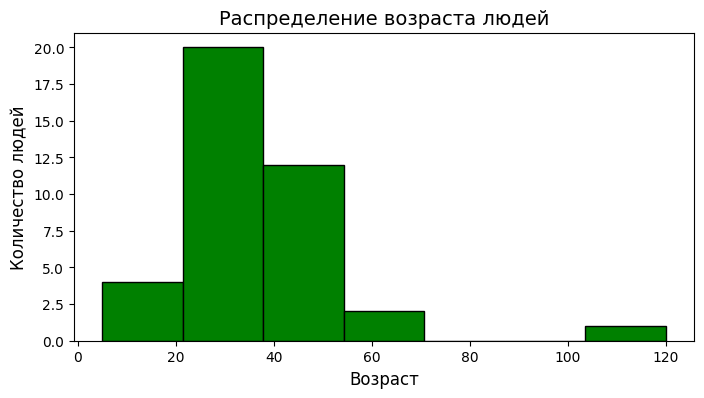

In [48]:
fig,ax = plt.subplots(figsize=(8,4))
n_bins = int(np.ceil(np.log2(len(dataset)))+1) # формула для расчета оптимального количества bin
ax.hist(dataset["age"],bins=n_bins,color="g",edgecolor="black")
ax.set_xlabel("Возраст",fontsize=12)
ax.set_ylabel("Количество людей",fontsize=12)
ax.set_title("Распределение возраста людей",fontsize=14)
plt.savefig('figures/age_histogram.png')
plt.show()

Выведем один боксплот распределения дохода по странам

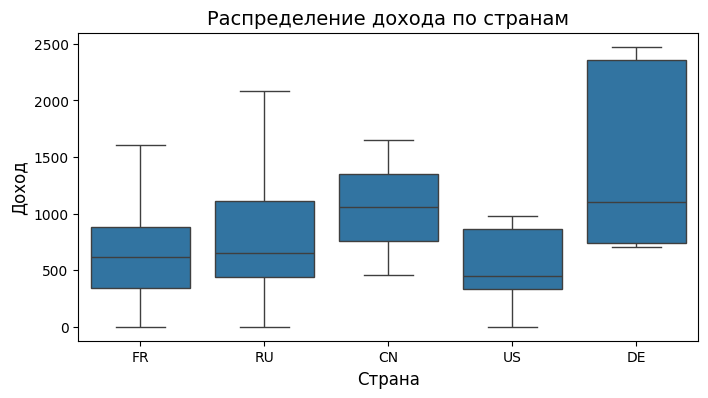

In [49]:
fig,ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=dataset,x='country',y='revenue',ax=ax)
ax.set_xlabel("Страна",fontsize=12)
ax.set_ylabel("Доход",fontsize=12)
ax.set_title("Распределение дохода по странам",fontsize=14)
plt.savefig('figures/revenue_by_country_boxplot.png')
plt.show()

Построим диаграмму рассеяния распределения дохода от возраста людей

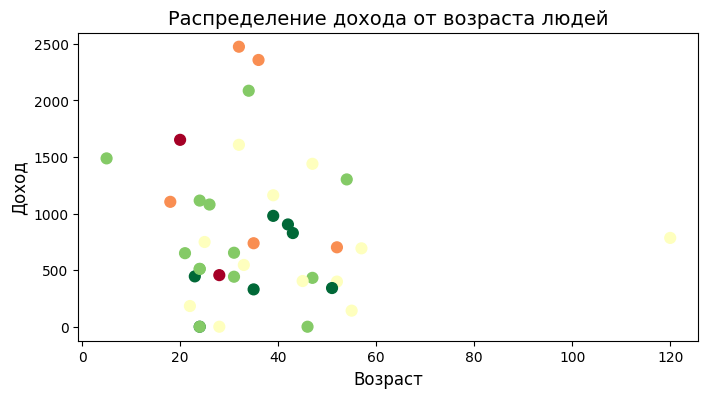

In [50]:
fig,ax = plt.subplots(figsize=(8,4))
country_codes = pd.Categorical(dataset["country"]).codes
scatter = ax.scatter(dataset['age'],dataset["revenue"],c = country_codes,cmap="RdYlGn",s=60)
ax.set_xlabel("Возраст",fontsize=12)
ax.set_ylabel("Доход",fontsize=12)
ax.set_title("Распределение дохода от возраста людей",fontsize=14)
plt.savefig('figures/age_vs_revenue_scatter.png')
plt.show()

Также дополнительно построим гистограмму количества покупок

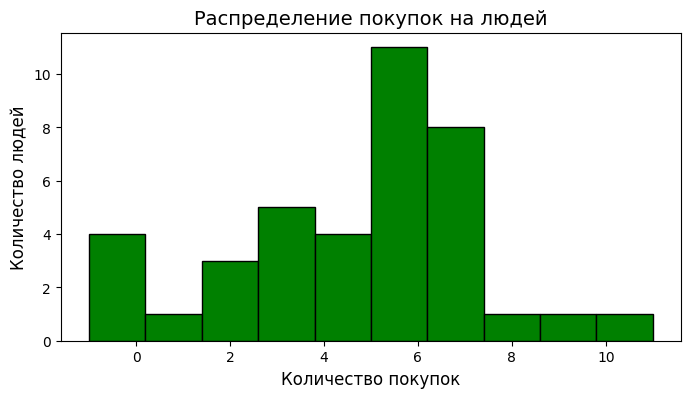

In [51]:
fig,ax = plt.subplots(figsize=(8,4))
n_bins = min(10,len(dataset["purchases"].unique())) #расчет оптимального количества bin
ax.hist(dataset["purchases"],bins=n_bins,color="g",edgecolor="black")
ax.set_xlabel("Количество покупок",fontsize=12)
ax.set_ylabel("Количество людей",fontsize=12)
ax.set_title("Распределение покупок на людей",fontsize=14)
plt.savefig('figures/purchases_histogram.png')
plt.show()